## Description
using some NLP libraries to try to identify the topic of a wikipedia article without reading it. In addition, identify important named entities in the article

### Import libraries 

In [4]:
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import spacy

In [5]:
#reading the article 
file = r"E:\DataCamp_Courses\intro to NLP with python\Wikipedia articles\wiki_text_debugging.txt"
with open(file) as f:
    article = f.read()


In [6]:
# Tokenize the article
tokens = word_tokenize(article)

### Preprocessing 

In [7]:
#lowercase all words in the article
lower_tokens = [t.lower() for t in tokens]

In [8]:
#choose alphabetical words only 
alpha_only = [t for t in lower_tokens if t.isalpha()]

In [9]:
#remove stopwords like that, that...
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

In [10]:
#remove/reduce inflection of words (the root of words)
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [11]:
#Bag of Words
bow = Counter(lemmatized)
print(bow.most_common(10))

[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


We can see that the word "debugging" and other words related to it are most common in the article, so the topic is most likely to be Debugging.
Let's read the article to make sure!

In [12]:
print(article)

'''Debugging''' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  

Numerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.

Origin
A computer log entry from the Mark&nbsp;II, with a moth taped to the page

The terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operation, whereupon s

and voila, the topic is "Debugging" 

### Named Entity Recognition (NER)
Now let's figure out the important entities in the article with Named Entity Recognition (NER) using SpaCy

In [15]:
nlp = spacy.load('en')
nlp.entity
doc = nlp(article)
doc.ents

(Statistical Process Control,
 Mark&nbsp;II,
 Grace Hopper,
 FOLDOC,
 Harvard,
 Harvard University,
 at least to 1878,
 Thomas Edison,
 July 2015}}.,
  ,
 J. Robert Oppenheimer,
 WWII,
 Manhattan,
 Los Alamos,
 NM,
 Ernest Lawrence,
 UC Berkeley,
 October 27,
 Exhibits/,
 The Oxford,
 English Dictionary,
 1945,
 the Journal of the Royal Aeronautical Society,
 Airforce,
 June 1945,
 p.&nbsp;50,
 Hopper,
 September 9, 1947,
 the early 1950s,
 ,
 GillS. Gill,
 The Diagnosis of Mistakes,
 Programmes,
 EDSAC,
 the Royal Society of London,
 Physical Sciences, Vol,
 206,
 1087,
 May 22, 1951,
 538-554,
 1951,
 ,
 Association for Computing,
 first,
 three,
 1952,
 ACM National Meetings,
 Robert V. D. Campbell,
 http://portal.acm.org/citation.cfm?id=609784.609786 Evolution,
 1952,
 ACM,
 Pittsburgh,
 29-32,
 1952.Alex,
 1952,
 ACM,
 Pittsburgh,
 91-95,
 1952.Howard,
 B. Demuth,
 John B. Jackson,
 Edmund Klein,
 N. Metropolis,
 Walter Orvedahl,
 James H. Richardson,
 MANIAC,
 1952,
 ACM,
 Toront

In [17]:
#Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Statistical Process Control
NORP Mark&nbsp;II
PERSON Grace Hopper
ORG FOLDOC
ORG Harvard
ORG Harvard University
CARDINAL at least to 1878
PERSON Thomas Edison
DATE July 2015}}.
ORDINAL  
PERSON J. Robert Oppenheimer
EVENT WWII
GPE Manhattan
GPE Los Alamos
GPE NM
PERSON Ernest Lawrence
ORG UC Berkeley
DATE October 27
ORG Exhibits/
WORK_OF_ART The Oxford
PERSON English Dictionary
DATE 1945
ORG the Journal of the Royal Aeronautical Society
WORK_OF_ART Airforce
DATE June 1945
PERSON p.&nbsp;50
GPE Hopper
DATE September 9, 1947
DATE the early 1950s
GPE 

PERSON GillS. Gill
ORG The Diagnosis of Mistakes
ORG Programmes
ORG EDSAC
ORG the Royal Society of London
ORG Physical Sciences, Vol
CARDINAL 206
DATE 1087
DATE May 22, 1951
CARDINAL 538-554
DATE 1951
GPE 

ORG Association for Computing
ORDINAL first
CARDINAL three
DATE 1952
ORG ACM National Meetings
PERSON Robert V. D. Campbell
WORK_OF_ART http://portal.acm.org/citation.cfm?id=609784.609786 Evolution
DATE 1952
ORG ACM
GPE Pittsburgh
CA

### Histogram
Word length distribution in histogram 

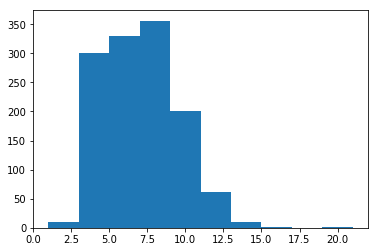

In [30]:
word_length = [len(n) for n in lemmatized]
plt.hist(word_length)
plt.show()